# Grades of Students dataset

Problem Statement: The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description -- total 43 columns -Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Grades.csv",sep='\t')
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [3]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
# checking for the missing values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

IT SHOWS THAT many COLUMNS HAS NULL VALUES

<AxesSubplot:>

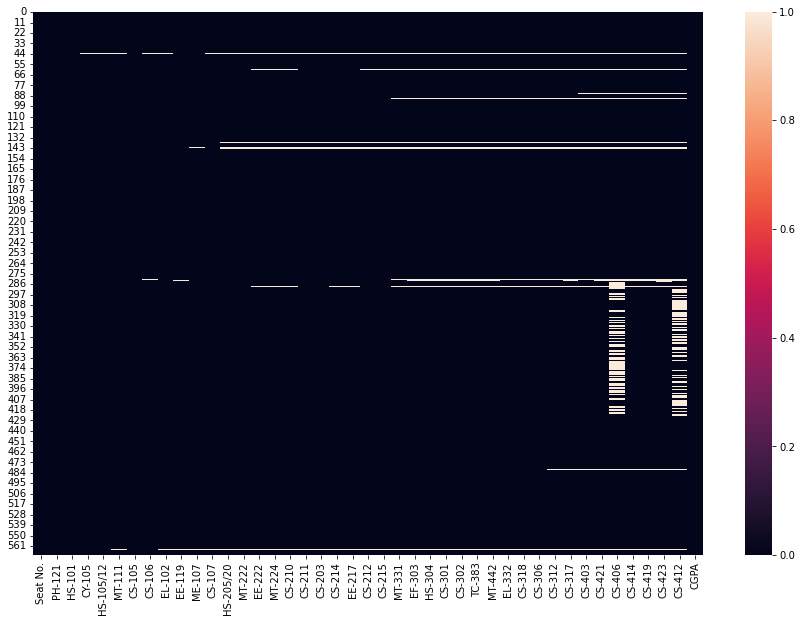

In [7]:
#to check missing values
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [8]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [9]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

# Dropping inconsistent columns

In [10]:
# Since seat number doesnot seem like a strong predictor of cgpa we drop it
df.drop(['Seat No.'],axis='columns',inplace=True)

In [11]:
df.head()

PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  ...  \
0     B-     D+     C-      C     C-     D+      D     C-     B-     C-  ...   
1      A      D     D+      D     B-      C      D      A     D+      D  ...   
2      A      B      A     B-     B+      A     B-     B+     A-     A-  ...   
3      D     C+     D+      D      D     A-     D+     C-      D     C+  ...   
4     A-     A-     A-     B+      A      A     A-     B+      A     A-  ...   

  CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1     D+      D      C      D     A-     B-      C      C      B  2.008  
2      B      B      A      C      A      A      A     A-      A  3.608  
3     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

In [12]:
missingdata=df.isnull()

In [13]:
#returns counts of values where True if null
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("")  

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    570
True       1
Name: CY-105, dtype: int64

HS-105
False    570
True       1
Name: HS-105, dtype: int64

MT-111
False    569
True       2
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    569
True       2
Name: CS-106, dtype: int64

EL-102
False    569
True       2
Name: EL-102, dtype: int64

EE-119
False    569
True       2
Name: EE-119, dtype: int64

ME-107
False    569
True       2
Name: ME-107, dtype: int64

CS-107
False    569
True       2
Name: CS-107, dtype: int64

HS-205
False    566
True       5
Name: HS-205, dtype: int64

MT-222
False    566
True       5
Name: MT-222, dtype: int64

EE-222
False    564
True       7
Name: EE-222, dtype: int64

MT-224
False    564
True       7
Name: MT-224, dtype: int64

CS-210
False    564
True       7
Name: CS-210, dtype: int64

CS-211
False    566
True       5
Name: CS-211, dtype: int64

CS

In [14]:
# returns records where HS-205 has null values
df[df['HS-205'].isnull()]

PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
44       D      C    NaN    NaN    NaN     C-    NaN    NaN     D+     WU   
137     C-     C+     WU     WU     WU      B     WU     WU     A-     C+   
142     C+     B-      B     A-      A     A-      C     WU     A-    NaN   
143      D      D     WU     WU     WU      D     WU     WU      D     WU   
565      F      F      D     C-    NaN     D+      D    NaN    NaN    NaN   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
44   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.493  
137  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.653  
142  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  2.943  
143  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  1.000  
565  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  0.800  

[5 rows x 42 columns]

In [15]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
# replaces missing data with modes

df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [16]:
#confirmation that all null values are replaced 
for column in df_most_common_imputed.isnull().columns.values.tolist():
    print(column)
    print (df_most_common_imputed.isnull()[column].value_counts())
    print("")

PH-121
False    571
Name: PH-121, dtype: int64

HS-101
False    571
Name: HS-101, dtype: int64

CY-105
False    571
Name: CY-105, dtype: int64

HS-105
False    571
Name: HS-105, dtype: int64

MT-111
False    571
Name: MT-111, dtype: int64

CS-105
False    571
Name: CS-105, dtype: int64

CS-106
False    571
Name: CS-106, dtype: int64

EL-102
False    571
Name: EL-102, dtype: int64

EE-119
False    571
Name: EE-119, dtype: int64

ME-107
False    571
Name: ME-107, dtype: int64

CS-107
False    571
Name: CS-107, dtype: int64

HS-205
False    571
Name: HS-205, dtype: int64

MT-222
False    571
Name: MT-222, dtype: int64

EE-222
False    571
Name: EE-222, dtype: int64

MT-224
False    571
Name: MT-224, dtype: int64

CS-210
False    571
Name: CS-210, dtype: int64

CS-211
False    571
Name: CS-211, dtype: int64

CS-203
False    571
Name: CS-203, dtype: int64

CS-214
False    571
Name: CS-214, dtype: int64

EE-217
False    571
Name: EE-217, dtype: int64

CS-212
False    571
Name: CS-212, dtype:

In [17]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

Column name is: MT-111 and it value is:
 A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

Column name is: CS-105 and it value is:

In [18]:
# this is the dataframe we imputed with modes
for i in df_most_common_imputed.columns:
    x = df_most_common_imputed[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

Column name is: HS-105 and it value is:
 A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

Column name is: MT-111 and it value is:
 A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

Column name is: CS-105 and it value is:

In [19]:
# locates records with Wu and W then drops by their indices
DF=df_most_common_imputed   
for i in DF.columns:
    DF.drop(DF[(DF.loc[:,i]=='WU')| (DF.loc[:,i]=='W')].index,inplace=True)

In [20]:
DF.reset_index(drop=True,inplace=True)

In [21]:
DF

PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-      C     C-     D+      D     C-     B-     C-   
1        A      D     D+      D     B-      C      D      A     D+      D   
2        A      B      A     B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+      D      D     A-     D+     C-      D     C+   
4       A-     A-     A-     B+      A      A     A-     B+      A     A-   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
542      B      A      A     A-     A+      A     A-     A-     A+     B+   
543     A+      A      A      A      A      A      A     A-      A      A   
544      B      A     A-     B+      A      A      A      A      A      B   
545      A     B+      D      A      D     D+     B-     C-     B-     C-   
546      C      D      D      C      C     D+      B     C+      C     D+   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0    ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1    ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2    ...      B      B      A      C      A      A      A     A-      A  3.608  
3    ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4    ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
542  ...     A-     A-      A      A      A     B+     B+      B      A  3.798  
543  ...     B+     B+      A      A     A-      B     A-      C     A-  3.772  
544  ...     A-      B      A     B+      A      C     B+     A-     A-  3.470  
545  ...      D      B      B     C-      D      C      B     B-      C  2.193  
546  ...     C+      C     B-      D      F     C-     B+      D     C-  1.753  

[547 rows x 42 columns]

In [22]:
# confirms the removal of WU and W graded records
for column in DF.columns.values.tolist():
    print(column)
    print (DF[column].isin(['WU','W']).value_counts())
    print("")

PH-121
False    547
Name: PH-121, dtype: int64

HS-101
False    547
Name: HS-101, dtype: int64

CY-105
False    547
Name: CY-105, dtype: int64

HS-105
False    547
Name: HS-105, dtype: int64

MT-111
False    547
Name: MT-111, dtype: int64

CS-105
False    547
Name: CS-105, dtype: int64

CS-106
False    547
Name: CS-106, dtype: int64

EL-102
False    547
Name: EL-102, dtype: int64

EE-119
False    547
Name: EE-119, dtype: int64

ME-107
False    547
Name: ME-107, dtype: int64

CS-107
False    547
Name: CS-107, dtype: int64

HS-205
False    547
Name: HS-205, dtype: int64

MT-222
False    547
Name: MT-222, dtype: int64

EE-222
False    547
Name: EE-222, dtype: int64

MT-224
False    547
Name: MT-224, dtype: int64

CS-210
False    547
Name: CS-210, dtype: int64

CS-211
False    547
Name: CS-211, dtype: int64

CS-203
False    547
Name: CS-203, dtype: int64

CS-214
False    547
Name: CS-214, dtype: int64

EE-217
False    547
Name: EE-217, dtype: int64

CS-212
False    547
Name: CS-212, dtype:

# Encoding Categorical Values

In [23]:
for column in DF.columns:
    
    DF[column]=DF[column].replace('A+',4.0)
    DF[column]=DF[column].replace('A',3.7)
    DF[column]=DF[column].replace('A-',3.4)
    DF[column]=DF[column].replace('B+',3.1)
    DF[column]=DF[column].replace('B',2.8)
    DF[column]=DF[column].replace('B-',2.5)
    DF[column]=DF[column].replace('C+',2.2)
    DF[column]=DF[column].replace('C',1.9)
    DF[column]=DF[column].replace('C-',1.6)
    DF[column]=DF[column].replace('D+',1.3)
    DF[column]=DF[column].replace('D',1.0)
    DF[column]=DF[column].replace('F',0.0)

In [24]:
DF.head()

PH-121  HS-101  CY-105  HS-105  MT-111  CS-105  CS-106  EL-102  EE-119  \
0     2.5     1.3     1.6     1.9     1.6     1.3     1.0     1.6     2.5   
1     3.7     1.0     1.3     1.0     2.5     1.9     1.0     3.7     1.3   
2     3.7     2.8     3.7     2.5     3.1     3.7     2.5     3.1     3.4   
3     1.0     2.2     1.3     1.0     1.0     3.4     1.3     1.6     1.0   
4     3.4     3.4     3.4     3.1     3.7     3.7     3.4     3.1     3.7   

   ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0     1.6  ...     1.6     1.6     1.6     1.6     3.4     3.7     1.6   
1     1.0  ...     1.3     1.0     1.9     1.0     3.4     2.5     1.9   
2     3.4  ...     2.8     2.8     3.7     1.9     3.7     3.7     3.7   
3     2.2  ...     1.3     1.9     1.3     1.6     2.5     2.8     2.2   
4     3.4  ...     2.5     3.1     3.1     2.5     3.4     3.7     3.4   

   CS-423  CS-412   CGPA  
0     2.8     3.4  2.205  
1     1.9     2.8  2.008  
2     3.4     3.7  3.608  
3     2.2     2.2  1.906  
4     3.4     3.7  3.448  

[5 rows x 42 columns]

In [25]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

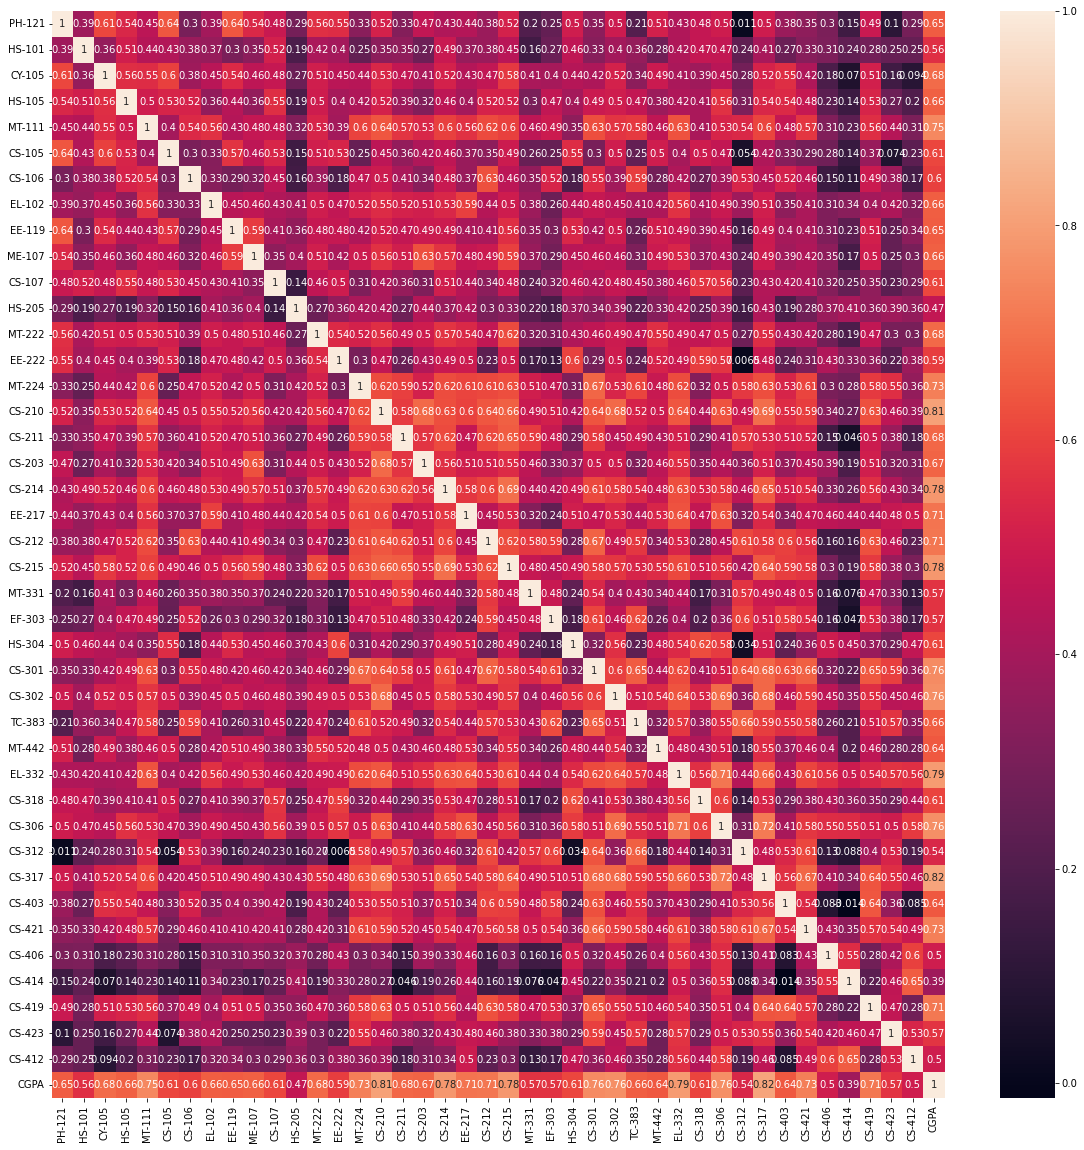

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(DF.corr(),annot=True)
plt.show()
# the heat map looks complicated but just focus on the last column the correlation of all the course GPAs are pretty strong as it should be.

CGPA Has positive correlation with all the columns

<AxesSubplot:xlabel='CGPA', ylabel='PH-121'>

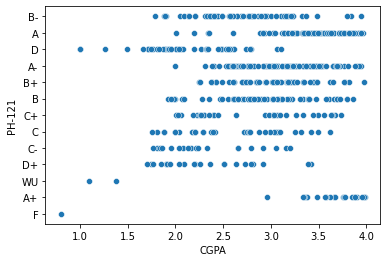

In [28]:
sns.scatterplot(x='CGPA',y='PH-121',data=df)

In [30]:
sns.pairplot(DF)

In [32]:
DF.describe()

PH-121      HS-101      CY-105      HS-105      MT-111      CS-105  \
count  547.000000  547.000000  547.000000  547.000000  547.000000  547.000000   
mean     2.850823    2.468556    3.078062    2.720475    2.831079    3.132358   
std      0.860623    0.811433    0.807629    0.917465    0.827206    0.720421   
min      0.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
25%      2.500000    1.900000    2.800000    1.900000    2.200000    2.800000   
50%      3.100000    2.500000    3.400000    2.800000    3.100000    3.400000   
75%      3.400000    3.100000    3.700000    3.400000    3.400000    3.700000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  547.000000  547.000000  547.000000  547.000000  ...  547.000000   
mean     2.774223    2.810420    2.831261    2.555393  ...    2.807861   
std      0.749831    0.860329    0.725258    0.902958  ...    0.981044   
min      1.000000    1.000000    1.000000    1.000000  ...    0.000000   
25%      2.500000    2.200000    2.350000    1.900000  ...    1.900000   
50%      2.800000    3.100000    3.100000    2.800000  ...    3.100000   
75%      3.400000    3.400000    3.400000    3.400000  ...    3.700000   
max      4.000000    4.000000    4.000000    4.000000  ...    4.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  547.000000  547.000000  547.000000  547.000000  547.000000  547.000000   
mean     2.548263    2.910786    2.371298    3.113346    3.233272    2.826691   
std      0.773231    0.788245    0.786446    0.645884    0.616047    0.652987   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.900000    2.500000    1.900000    2.800000    3.100000    2.500000   
50%      2.500000    3.100000    2.500000    3.400000    3.400000    2.800000   
75%      3.100000    3.700000    2.800000    3.400000    3.700000    3.400000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-423      CS-412        CGPA  
count  547.000000  547.000000  547.000000  
mean     2.784278    3.082998    2.995388  
std      0.780397    0.623696    0.587388  
min      0.000000    0.000000    0.800000  
25%      2.200000    2.800000    2.587500  
50%      3.100000    3.400000    3.058000  
75%      3.400000    3.400000    3.474000  
max      4.000000    4.000000    3.985000  

[8 rows x 42 columns]

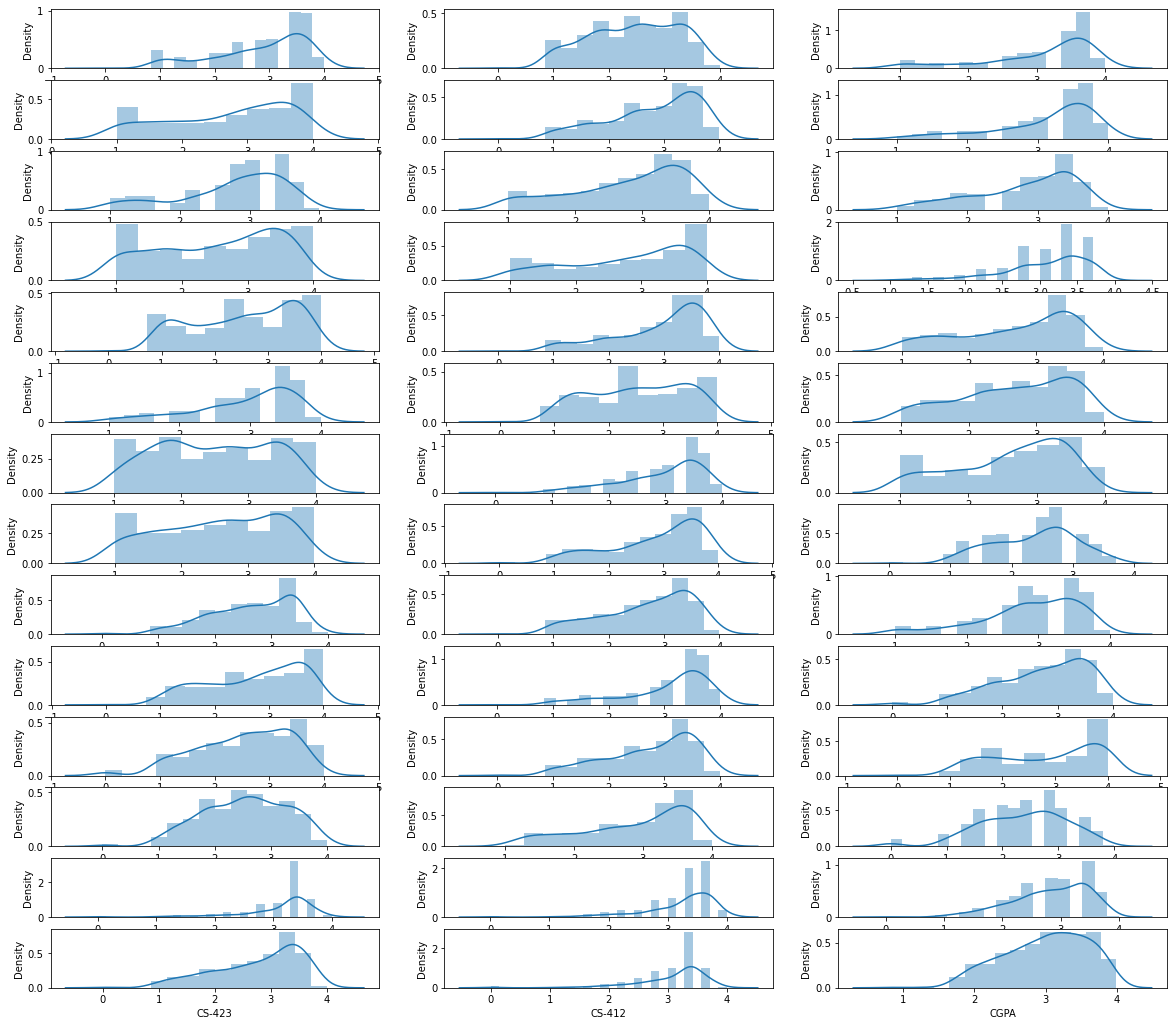

In [37]:
fig,ax = plt.subplots(14,3,figsize=(20,18))
row = col = 0
for n,i in enumerate(DF.columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.distplot(DF[i],kde=True,ax=ax[row,col])
    col += 1

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

# Splitting the dataset

In [45]:
x = DF.drop(['CGPA'], axis=1) # List of input variables
y = DF['CGPA'] # Target


In [46]:
x.shape, y.shape

((547, 41), (547,))

In [47]:
x

PH-121  HS-101  CY-105  HS-105  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       2.5     1.3     1.6     1.9     1.6     1.3     1.0     1.6     2.5   
1       3.7     1.0     1.3     1.0     2.5     1.9     1.0     3.7     1.3   
2       3.7     2.8     3.7     2.5     3.1     3.7     2.5     3.1     3.4   
3       1.0     2.2     1.3     1.0     1.0     3.4     1.3     1.6     1.0   
4       3.4     3.4     3.4     3.1     3.7     3.7     3.4     3.1     3.7   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
542     2.8     3.7     3.7     3.4     4.0     3.7     3.4     3.4     4.0   
543     4.0     3.7     3.7     3.7     3.7     3.7     3.7     3.4     3.7   
544     2.8     3.7     3.4     3.1     3.7     3.7     3.7     3.7     3.7   
545     3.7     3.1     1.0     3.7     1.0     1.3     2.5     1.6     2.5   
546     1.9     1.0     1.0     1.9     1.9     1.3     2.8     2.2     1.9   

     ME-107  ...  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       1.6  ...     1.9     1.6     1.6     1.6     1.6     3.4     3.7   
1       1.0  ...     1.0     1.3     1.0     1.9     1.0     3.4     2.5   
2       3.4  ...     3.4     2.8     2.8     3.7     1.9     3.7     3.7   
3       2.2  ...     1.6     1.3     1.9     1.3     1.6     2.5     2.8   
4       3.4  ...     3.4     2.5     3.1     3.1     2.5     3.4     3.7   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
542     3.1  ...     3.1     3.4     3.4     3.7     3.7     3.7     3.1   
543     3.7  ...     3.4     3.1     3.1     3.7     3.7     3.4     2.8   
544     2.8  ...     3.1     3.4     2.8     3.7     3.1     3.7     1.9   
545     1.6  ...     3.1     1.0     2.8     2.8     1.6     1.0     1.9   
546     1.3  ...     1.3     2.2     1.9     2.5     1.0     0.0     1.6   

     CS-419  CS-423  CS-412  
0       1.6     2.8     3.4  
1       1.9     1.9     2.8  
2       3.7     3.4     3.7  
3       2.2     2.2     2.2  
4       3.4     3.4     3.7  
..      ...     ...     ...  
542     3.1     2.8     3.7  
543     3.4     1.9     3.4  
544     3.1     3.4     3.4  
545     2.8     2.5     1.9  
546     3.1     1.0     1.6  

[547 rows x 41 columns]

In [48]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
542    3.798
543    3.772
544    3.470
545    2.193
546    1.753
Name: CGPA, Length: 547, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


# Model Selection

linear_model = LinearRegression()
svr_model = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')

rfr_model = RandomForestRegressor(max_depth=2, max_features="sqrt")
knr_model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [57]:
# Training the models

linear_model.fit(x_train, y_train)
svr_model.fit(x_train, y_train)

rfr_model.fit(x_train, y_train)
knr_model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [58]:
# Predictions

pred_linear = linear_model.predict(x_test)
pred_svr = svr_model.predict(x_test)

pred_rfr = rfr_model.predict(x_test)
pred_knr = knr_model.predict(x_test)

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [60]:
from math import sqrt
mse_linear = mean_squared_error(y_test, pred_linear)
mse_svr = mean_squared_error(y_test, pred_svr)

mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_knr = mean_squared_error(y_test, pred_knr)

rmse_linear = sqrt(mse_linear)
rmse_svr = sqrt(mse_svr)

rmse_rfr = sqrt(mse_rfr)
rmse_knr = sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)

print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  0.07966288037221429
RMSE of Support Vector Regression is:  0.14875872969928516
RMSE of Random Forest Regressor is:  0.2659750984712131
RMSE of K Neighbors Regressor is:  0.13764833405680268


In [61]:
print(f"R2 Score for Linear Regression is: ", r2_score(y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(y_test, pred_svr, multioutput='variance_weighted')*100)

print(f"R2 Score for Random Forest Regressor is: ", r2_score(y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  98.18016130414097
R2 Score for Support Vector Regression is:  93.65420837373453
R2 Score for Random Forest Regressor is:  79.7137000902303
R2 Score for K Neighbors Regressor is:  94.56671102393406


Linear Regression model has higher score

In [62]:
lr=LinearRegression()

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred=lr.predict(x_train)

In [65]:
ypred=lr.predict(x_test)

In [66]:
lr.score(x_train,y_train)

0.9644776085752633

In [67]:
lr.score(x_test,y_test)

0.9818016130414097

In [68]:
print('R2 score:',r2_score(ypred,y_test))

R2 score: 0.9809940973604432


In [69]:
print('R2 score:',r2_score(y_pred,y_train))

R2 score: 0.9631692938136628


In [70]:
mean_squared_error(y_test,ypred)

0.006346174509197726

In [71]:
print(np.sqrt(mean_squared_error(y_test,ypred)))

0.07966288037221429


In [72]:
lr.coef_

array([ 0.0806367 ,  0.05369267,  0.06094991,  0.02373902,  0.00875757,
        0.05603474,  0.05767989,  0.0304235 ,  0.0052272 ,  0.01981519,
       -0.01102363,  0.0221141 ,  0.00168302,  0.0096317 ,  0.02429807,
        0.04045894,  0.03746652,  0.01382964,  0.06072966,  0.01244965,
       -0.00837168,  0.01138955,  0.03544462,  0.00776963,  0.00030479,
        0.0474928 ,  0.03731311,  0.0237532 ,  0.02785203,  0.03369225,
       -0.00198989,  0.01657602, -0.00552414,  0.03863301,  0.02977449,
        0.03938585,  0.04147954,  0.04647166,  0.00215685,  0.038322  ,
        0.02217354])

In [73]:
residual=y_test-ypred
residual

176    0.031944
77    -0.032827
361   -0.035811
90     0.035023
368    0.079749
         ...   
173   -0.017240
124   -0.004756
479   -0.095053
528    0.077822
167    0.075570
Name: CGPA, Length: 137, dtype: float64

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

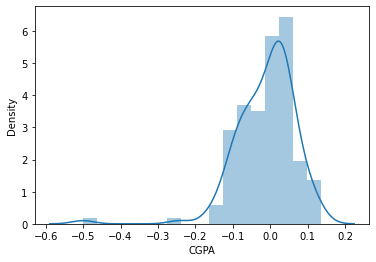

In [74]:
sns.distplot(residual)

Text(0, 0.5, 'predicted val')

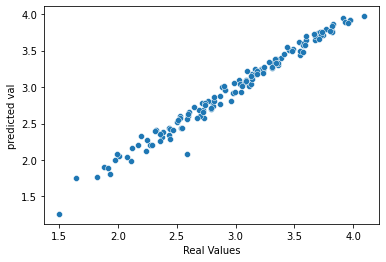

In [75]:
sns.scatterplot(ypred,y_test)
plt.xlabel("Real Values")
plt.ylabel("predicted val")

This plot shows that predicted and real values are highly correlated / accurate prediction

# Cross validation

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
train_accuracy = r2_score(y_train,y_pred)
test_accuracy = r2_score(y_test,ypred)

for i in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=i)
    cv_mean = cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}.")
    print("\n")

At cross fold 2 the cv score is 0.893801482956641 and accuracy score for training is 0.9644776085752633 and accuracy for testing is 0.9818016130414097.


At cross fold 3 the cv score is 0.9164903850375108 and accuracy score for training is 0.9644776085752633 and accuracy for testing is 0.9818016130414097.


At cross fold 4 the cv score is 0.8963224591547918 and accuracy score for training is 0.9644776085752633 and accuracy for testing is 0.9818016130414097.


At cross fold 5 the cv score is 0.9500216251994196 and accuracy score for training is 0.9644776085752633 and accuracy for testing is 0.9818016130414097.


At cross fold 6 the cv score is 0.9475537938889705 and accuracy score for training is 0.9644776085752633 and accuracy for testing is 0.9818016130414097.


At cross fold 7 the cv score is 0.954285924831348 and accuracy score for training is 0.9644776085752633 and accuracy for testing is 0.9818016130414097.


At cross fold 8 the cv score is 0.9537257703654095 and accuracy score fo

At all cv the accuaracies are same, We Take CV9, as the accuracies are maximum at cv9

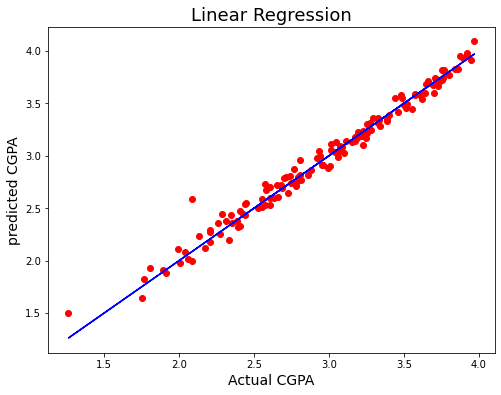

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x=y_test,y=ypred, color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel("Actual CGPA",fontsize=14)
plt.ylabel("predicted CGPA",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.savefig("LR_Happiness.png")
plt.show()

# Regularisation

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1.0,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


# Final Model Training

In [80]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

96.44752184012427

In [81]:
pred_ls = ls.predict(x_test)

In [82]:
lss = r2_score(y_test,pred_ls)
lss*100

98.2078174874303

In [83]:
cv_score = cross_val_score(ls,x,y,cv=2)
cv_mean = cv_score.mean()
cv_mean*100

89.46819764838922

# Ensemble Technique

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
lr = LinearRegression()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [87]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')

rf.fit(x_train,y_train)

rf.score(x_train,y_train)

pred_decision = rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)

print("R2 Score:",rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)

rfc=rfscore.mean()
print("cross validation score:",rfc*100)


R2 Score: 93.33016608266198
cross validation score: 92.36659443456179


Our Accuracy score is dropped so we will opt for the starting Linear Regression model only

# saving the model

In [88]:
import pickle
filename = 'Student_Grade.pkl'
pickle.dump(lr,open(filename,'wb'))

# Loading The Model

In [89]:
import pickle
Loaded_Model = pickle.load(open('Student_Grade.pkl','rb'))
result = Loaded_Model.score(x_test,y_test)
print(result*100)

98.18016130414097


In [90]:
conclusion = pd.DataFrame([Loaded_Model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

0         1         2         3         4         5    \
Predicted  3.704056  3.679827  3.742811  3.825977  3.541251  3.049766   
Original   3.736000  3.647000  3.707000  3.861000  3.621000  2.931000   

               6         7         8         9    ...       127       128  \
Predicted  2.37306  2.531385  3.677294  2.432732  ...  2.598394  2.960647   
Original   2.31100  2.605000  3.696000  2.347000  ...  2.636000  2.805000   

                129      130       131      132       133       134       135  \
Predicted  3.342616  2.07913  2.794584  3.09324  3.178756  3.576053  2.328178   
Original   3.335000  2.04200  2.711000  3.07600  3.174000  3.481000  2.406000   

               136  
Predicted  2.31843  
Original   2.39400  

[2 rows x 137 columns]

It Show that the Linear Regression model is doing well with the data set prediction